## Project Outline
* Load Data
* Exploratory Analysis
* Initial Model
* Evaluation
* Feature Engineering
* Model 2
* Evaluation
* Further Investigation/Exploration

# Load Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import folium
from plotnine import *

In [2]:
df = pd.read_csv('NYC_Cab_Duration.csv')
df.head(2)

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808


# Exploratory Analysis
### Exceeds Standards
* Create heatmaps
* Investigate further relationships and trends between subsets

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583458 entries, 0 to 583457
Data columns (total 12 columns):
Unnamed: 0            583458 non-null int64
id                    583458 non-null object
vendor_id             583458 non-null int64
pickup_datetime       583458 non-null object
dropoff_datetime      583458 non-null object
passenger_count       583458 non-null int64
pickup_longitude      583458 non-null float64
pickup_latitude       583458 non-null float64
dropoff_longitude     583458 non-null float64
dropoff_latitude      583458 non-null float64
store_and_fwd_flag    583458 non-null object
trip_duration         583458 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 53.4+ MB


In [4]:
# Clean up the format of the dates
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
print(df['pickup_datetime'].dtype)

df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
print(df['dropoff_datetime'].dtype)
df.head(2)

datetime64[ns]
datetime64[ns]


,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808


In [5]:
# Add a column with the date changed to the day of the week
df['Day_of_Week'] = df['pickup_datetime'].dt.day_name()
df.head(2)

# Add a column that converts the trip_duration from seconds to minutes
df['trip_duration_minutes'] = df['trip_duration'] / 60
df.head(2)

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Day_of_Week,trip_duration_minutes
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,Thursday,36.166667
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,Wednesday,13.466667


In [6]:
# Clean up the table by removing the trip_duration column and the Unnamed column.
# The trip_duration is now in minutes instead of seconds.
# Since we don't know what the Unnamed column is for, we remove it.
# df = df.drop(columns='trip_duration')
# df = df.drop(columns='Unnamed: 0')

In [6]:
# Need to choose two variables to compare for the heat matrix.
print(df['vendor_id'].value_counts())

2    312326
1    271132
Name: vendor_id, dtype: int64


In [7]:
print(df['Day_of_Week'].value_counts())

Friday       89729
Saturday     88216
Thursday     87653
Wednesday    83710
Tuesday      81296
Sunday       78038
Monday       74816
Name: Day_of_Week, dtype: int64


In [8]:
df[['vendor_id', 'Day_of_Week']].head()

,vendor_id,Day_of_Week
0,1,Thursday
1,1,Wednesday
2,2,Wednesday
3,2,Thursday
4,2,Wednesday


In [9]:
# Transform the vendor_id and the Day_of_Week columns into a matrix.
# Extract Transform Load (ETL)
heat_matrix = df[['Day_of_Week', 'vendor_id']].pivot_table(
    index='Day_of_Week', columns='vendor_id',
    aggfunc=len,
    fill_value=0)

In [10]:
heat_matrix

vendor_id,1,2
Day_of_Week,,
Friday,41689,48040
Monday,34824,39992
Saturday,40882,47334
Sunday,36153,41885
Thursday,40951,46702
Tuesday,37445,43851
Wednesday,39188,44522


In [11]:
# Creating visuals
plt_df = (df
 .groupby(['Day_of_Week', 'vendor_id'])
 .apply(lambda x: pd.Series(dict(
     count = x.shape[0]
 )))
 .reset_index()
 .assign(vendor_id = lambda d: d['vendor_id'].map(str))
)

In [12]:
plt_df

,Day_of_Week,vendor_id,count
0,Friday,1,41689
1,Friday,2,48040
2,Monday,1,34824
3,Monday,2,39992
4,Saturday,1,40882
5,Saturday,2,47334
6,Sunday,1,36153
7,Sunday,2,41885
8,Thursday,1,40951
9,Thursday,2,46702


C:\Users\laure\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


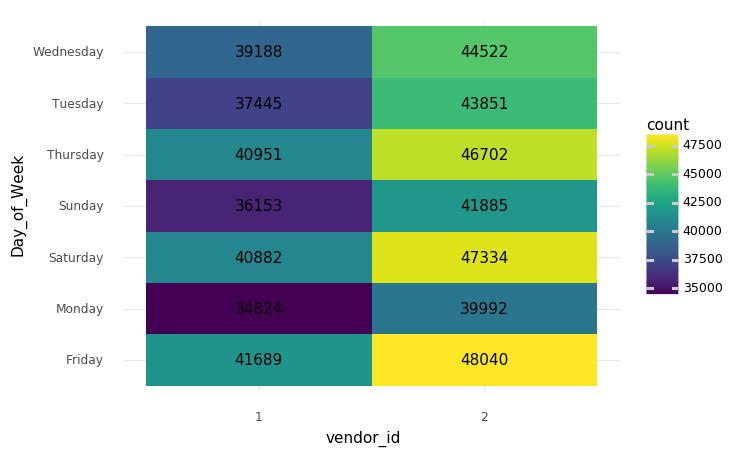

<ggplot: (-9223371864478798862)>

In [13]:
(ggplot(plt_df, aes(x='Day_of_Week', y='vendor_id'))
 + geom_tile(aes(fill='count'))
 + geom_text(aes(label='count'))
 + coord_flip()
 + theme_minimal()
)

C:\Users\laure\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\laure\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


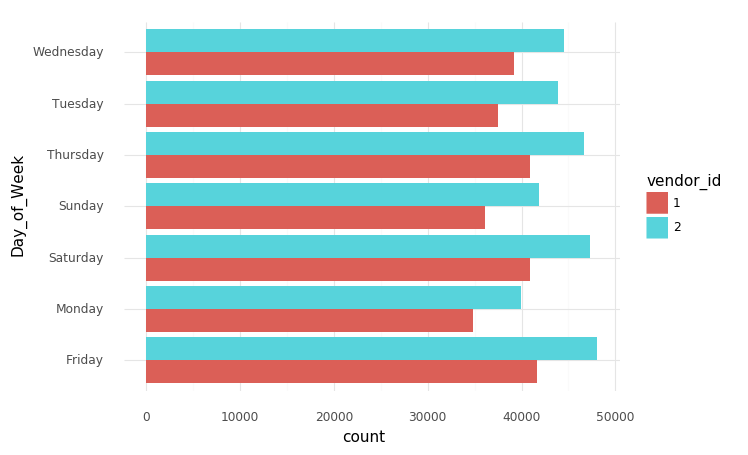

<ggplot: (-9223371864478684174)>

In [14]:
(ggplot(plt_df, aes(x='Day_of_Week', y='count', fill='vendor_id'))
 + geom_bar(stat='identity', position='dodge')
 + coord_flip()
 + theme_minimal()
)

In [15]:
# Clean up! Remove the minutes that are too high because they don't make any sense.
df = df.loc[~(df['trip_duration_minutes'] >= 1000), :]

In [16]:
# Clean up! Remove the values that are too high because they don't make any sense.
# Change to minimum values
df = df.loc[~(df['trip_duration_minutes'] <= 2), :]

In [17]:
#Retrieve the Average Latitude and Longitude to Center the Map
latp = df['pickup_latitude'].mean()
longp = df['pickup_longitude'].mean()
latd = df['dropoff_latitude'].mean()
longd = df['dropoff_longitude'].mean()

#Create a map of the area
cab_map = folium.Map([latp, longp])
cab_map

#Iterate through each row of a sample of the dataframe
for row in df.sample(500).index:
    latp = df['pickup_latitude'][row]
    longp = df['pickup_longitude'][row]
    latd = df['dropoff_latitude'][row]
    longd = df['dropoff_longitude'][row]
    dur = df['trip_duration_minutes'][row]
    passengers = df['passenger_count'][row]
    details = 'Duration: {} Passengers:{}'.format(dur, passengers)
    markerp = folium.Marker([latp, longp], icon=folium.Icon(color='green'))
    markerp.add_to(cab_map)
    markerd = folium.Marker([latd, longd])
    markerd.add_to(cab_map)
cab_map

In [18]:
from folium import plugins
from folium.plugins import HeatMap

In [19]:
# Need to change the 'Weight' value. Currently it is not showing the correct thing.
heat_df = df[['dropoff_latitude', 'dropoff_longitude', 'trip_duration_minutes']]


newyork_on_heatmap = folium.Map(location=[40.767937,-73.982155 ],tiles= "Stamen Terrain",
                   zoom_start = 13)

heat_df['Weight'] = heat_df['trip_duration_minutes']
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['dropoff_latitude','dropoff_longitude', 'Weight'])

# List comprehension to make out list of lists
heat_data = [[[row['dropoff_latitude'],row['dropoff_longitude']]
               for index, row in heat_df[heat_df['Weight'] == i].iterrows()]
                for i in range(0,6)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(newyork_on_heatmap)

# Display the map
newyork_on_heatmap

C:\Users\laure\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\laure\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0,0.5,'Occurrence')

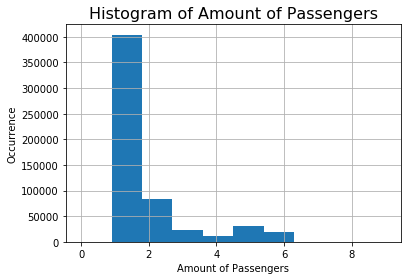

In [20]:
# A histogram is a bar graph where each bar represents the frequency of occurrence by classes of data.
df['passenger_count'].hist()
plt.title('Histogram of Amount of Passengers', size=16)
plt.xlabel('Amount of Passengers')
plt.ylabel('Occurrence')

In [21]:
# Separate data by month to graph
df['Month'] = df['pickup_datetime'].dt.month
df.head(2)

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Day_of_Week,trip_duration_minutes,Month
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,Thursday,36.166667,6
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,Wednesday,13.466667,3


C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


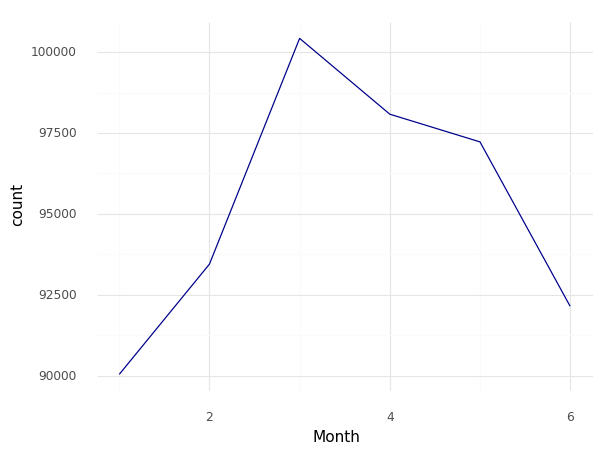

<ggplot: (-9223371864478575307)>

In [22]:
plt_df = (df
 .groupby(['Month'])
 .apply(lambda x: pd.Series(dict(
     count = x.shape[0]
 )))
 .reset_index()
)

(ggplot(plt_df, aes(x='Month', y='count')) 
 + geom_line(color='darkblue')
 + theme_minimal()
)

In [23]:
plt_df

,Month,count
0,1,90038
1,2,93445
2,3,100425
3,4,98081
4,5,97225
5,6,92142


C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\laure\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


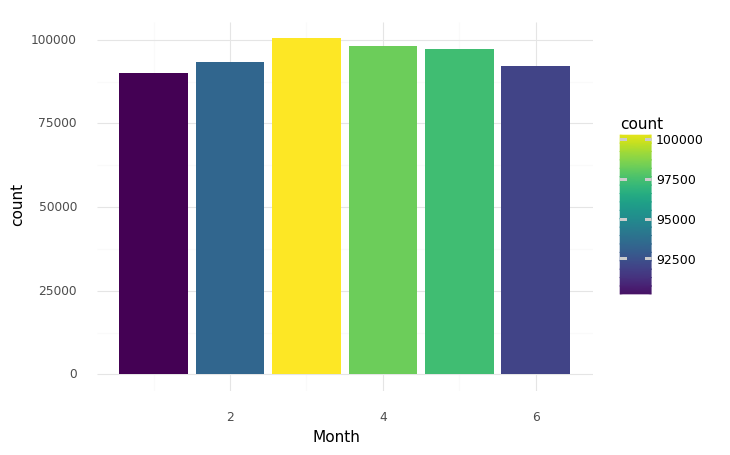

<ggplot: (-9223371864478796088)>

In [24]:
# Plotting with a bar chart looks better than the line chart.
(ggplot(plt_df, aes(x='Month', y='count', fill='count')) 
 + geom_bar(stat='identity')
 + theme_minimal()
)

# Initial Model
### Exceeds Standards
* Use preprocessing techniques such as creating dummy variables

In [25]:
df[['pickup_latitude', 'dropoff_latitude']].corr()

,pickup_latitude,dropoff_latitude
pickup_latitude,1.000000,0.495502
dropoff_latitude,0.495502,1.000000


In [26]:
df[['pickup_longitude', 'dropoff_longitude']].corr()

,pickup_longitude,dropoff_longitude
pickup_longitude,1.000000,0.884165
dropoff_longitude,0.884165,1.000000


[[1.         0.88416531]
 [0.88416531 1.        ]]


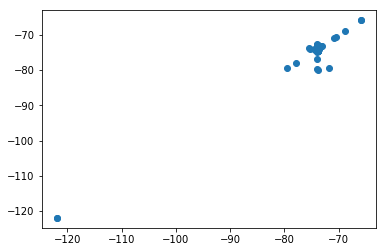

In [27]:
x , y = df['pickup_longitude'], df['dropoff_longitude']
print(np.corrcoef(x,y))
plt.scatter(x,y)

In [28]:
df['pickup_longitude'].max()

-65.848388671875

In [29]:
df['pickup_longitude'].min()

-121.93334197998048

In [30]:
df.loc[df['pickup_longitude'] == df['pickup_longitude'].min()]
# The location below is in San Jose, CA!

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Day_of_Week,trip_duration_minutes,Month
553552,1184454,id2854272,2,2016-02-26 13:50:19,2016-02-26 13:58:38,2,-121.933342,37.389381,-121.933304,37.389511,N,499,Friday,8.316667,2


In [31]:
# Need to remove the row that is located in San Jose, CA.
df = df.loc[~(df['pickup_longitude'] <= -100), :]

[[1.         0.38338703]
 [0.38338703 1.        ]]


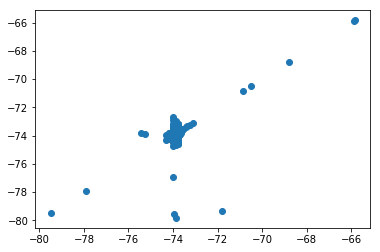

In [32]:
# Re-graph with the removal of the San Jose, CA coordinate.
x , y = df['pickup_longitude'], df['dropoff_longitude']
print(np.corrcoef(x,y))
plt.scatter(x,y)

In [33]:
vendor_id_dummies = pd.get_dummies(df['vendor_id'])
vendor_id_dummies.head()

,1,2
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [34]:
df['vendor_id_1'] = vendor_id_dummies.iloc[:,0]
df['vendor_id_2'] = vendor_id_dummies.iloc[:,1]

In [35]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Day_of_Week,trip_duration_minutes,Month,vendor_id_1,vendor_id_2
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,Thursday,36.166667,6,1,0
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,Wednesday,13.466667,3,1,0
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,Wednesday,63.116667,2,0,1
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,Thursday,11.316667,3,0,1
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,Wednesday,46.516667,4,0,1


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
X = df[['pickup_longitude', 'pickup_latitude',
          'dropoff_longitude', 'dropoff_latitude',
          'vendor_id_1', 'vendor_id_2',
          'passenger_count']]
y = df['trip_duration_minutes']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Evaluation
Regression techniques?
* Simple Regression Models
* Train / Test Split
* Lasso / Ridge Regression
* Cross Validation / Tuning

In [39]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('train_mse', train_mse)
print('test_mse', test_mse)

train_mse 11.712058332780991
test_mse 12.630546190963024


# Feature Engineering
### Exceeds Standards
* Goes through iterative processs
* Test hypothesis and the impact of various features on the model
* Select the most impactful features

In [40]:
# Separate by hour
df['hour'] = df['pickup_datetime'].dt.hour

In [41]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Day_of_Week,trip_duration_minutes,Month,vendor_id_1,vendor_id_2,hour
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,Thursday,36.166667,6,1,0,17
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,Wednesday,13.466667,3,1,0,10
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,Wednesday,63.116667,2,0,1,17
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,Thursday,11.316667,3,0,1,7
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,Wednesday,46.516667,4,0,1,17


In [42]:
# Separate the weekdays from the weekends
def is_weekend(row):
    if row['Day_of_Week'] in [4, 5, 6]:
        return 1
    else:
        return 0

In [46]:
# Separate hours into specific time categories
def hour_category(row):
    if row['hour'] in [1, 2, 3, 4, 5]:
        return 'late_night'
    elif row['hour'] in [6, 7, 8, 9, 10, 11]:
        return 'morning'
    elif row['hour'] in [12, 13, 14, 15, 16]:
        return 'afternoon'
    elif row['hour'] in [17, 18, 19, 20]:
        return 'evening'
    elif row['hour'] in [21, 22, 23, 24]:
        return 'night'

In [47]:
df['hour_cat'] = df.apply(hour_category, axis=1)
df['is_weekend'] = df.apply(is_weekend, axis=1)

In [48]:
hour_cat_dummies = pd.get_dummies(df['hour_cat'])
hour_cat_dummies.head()

,afternoon,evening,late_night,morning,night
0,0,1,0,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [49]:
df['hour_cat_afternoon'] = hour_cat_dummies.iloc[:,0]
df['hour_cat_evening'] = hour_cat_dummies.iloc[:,1]
df['hour_cat_late_night'] = hour_cat_dummies.iloc[:,2]
df['hour_cat_morning'] = hour_cat_dummies.iloc[:,3]
df['hour_cat_night'] = hour_cat_dummies.iloc[:,4]

In [50]:
df.head(2)

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,vendor_id_1,vendor_id_2,hour,hour_cat,is_weekend,hour_cat_afternoon,hour_cat_evening,hour_cat_late_night,hour_cat_morning,hour_cat_night
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,...,1,0,17,evening,0,0,1,0,0,0
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,...,1,0,10,morning,0,0,0,0,1,0


# Model 2
### Exceeds Standards
* Use preprocessing techniques such as creating dummy variables
* Same as the initial model section above

In [51]:
df.columns

Index(['Unnamed: 0', 'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Day_of_Week', 'trip_duration_minutes', 'Month',
       'vendor_id_1', 'vendor_id_2', 'hour', 'hour_cat', 'is_weekend',
       'hour_cat_afternoon', 'hour_cat_evening', 'hour_cat_late_night',
       'hour_cat_morning', 'hour_cat_night'],
      dtype='object')

In [52]:
X = df[['passenger_count', 'pickup_longitude',
        'pickup_latitude', 'dropoff_longitude', 
        'dropoff_latitude', 'vendor_id_1', 'vendor_id_2', 
        'is_weekend', 'hour_cat_afternoon', 
        'hour_cat_evening', 'hour_cat_late_night', 
        'hour_cat_morning', 'hour_cat_night']]

y = df['trip_duration_minutes']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Evaluation

In [54]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('train_mse', train_mse)
print('test_mse', test_mse)

train_mse 11.650034285545816
test_mse 12.583598508652358


# Further Investigation/Exploration

In [55]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [56]:
L1 = Lasso() #Lasso is also known as the L1 norm.
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, L1.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, L1.predict(X_test)))

Training r^2: 0.0
Testing r^2: -4.974395399726106e-05
Training MSE: 156.10022469231282
Testing MSE: 171.30125286608617


In [59]:
L1 = LassoCV(normalize=True)
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))
print('Best alpha:', L1.alpha_)

Training r^2: 0.1269046984207307
Testing r^2: 0.08295936139220883
Training MSE: 11.674346780626596
Testing MSE: 12.533251630089014
Best alpha: 0.00038619686395233947


In [66]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

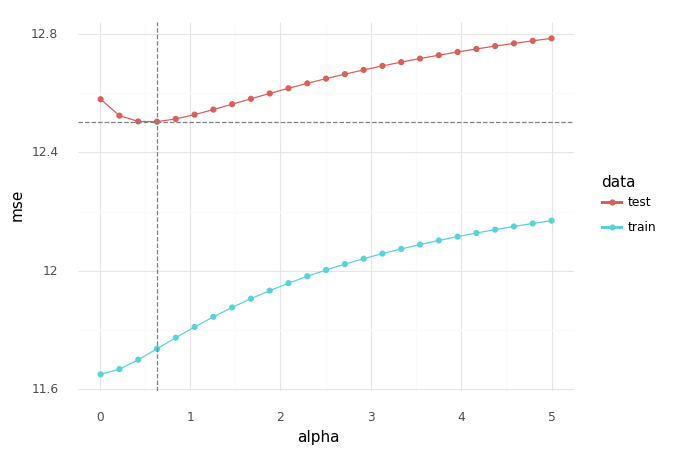

<ggplot: (172390198234)>

In [68]:
#Your code here
alphas = []
mse_tr = []
mse_te = []
for alpha in np.linspace(start=0.01, stop=5, num=25):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        L1 = Ridge(alpha=alpha, normalize=True)
        L1.fit(X_train, y_train)
    mse_tr.append(np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
    mse_te.append(np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))
    alphas.append(alpha)
    
mse_df = (pd.DataFrame({'alpha': alphas, 'train': mse_tr, 'test': mse_te})
          .assign(min_point = lambda d: d['test'].min())
          .assign(min_point = lambda d: d.apply(lambda x: 1 if x['test'] == x['min_point'] else 0, axis=1))
          .melt(id_vars=['alpha', 'min_point'], var_name='data', value_name='mse')
         )
min_alpha = mse_df.loc[lambda d: (d['min_point'] == 1) & (d['data'] == 'test'), 'alpha'].values[0]
min_mse = mse_df.loc[lambda d: (d['min_point'] == 1) & (d['data'] == 'test'), 'mse'].values[0]

(ggplot(mse_df, aes(x='alpha', y='mse', color='data'))
 + geom_line() + geom_point() 
 + geom_vline(xintercept=min_alpha, linetype='--', color='gray')
 + geom_hline(yintercept=min_mse, linetype='--', color='gray')
 + geom_text(x=min_alpha + 1, y=min_mse - 2000,
             label='alpha: {}, rmse: {}'.format(min_alpha.round(2).astype(str), min_mse.round(2).astype(str)),
             color='black'
            )
 + theme_minimal()
)

In [65]:
L2 = RidgeCV(normalize=True) #Lasso is also known as the L1 norm.
L2.fit(X_train, y_train)
print('Training r^2:', L2.score(X_train, y_train))
print('Testing r^2:', L2.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, L2.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, L2.predict(X_test))))
print('Best alpha:', L2.alpha_)

Training r^2: 0.12978334357344545
Testing r^2: 0.08059902669241636
Training MSE: 11.655085396477297
Testing MSE: 12.549370685516434
Best alpha: 0.1
